# Download Stable Diffusion

1 - Log into Huggin Face and accept [Stable Diffusion License](https://huggingface.co/runwayml/stable-diffusion-v1-5)  

2 - [Generate a token here](https://huggingface.co/settings/tokens) and copy it

3 - Create a *huggingface_token.token* file and paste the token in it

In [1]:
with open('huggingface_token.token') as f:
    lines = f.readlines()
    
token = lines[0]

- Let's check if our GPU is visible to docker. You should see the name of your GPU somewhere in this table.

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 2070 with Max-Q Design (UUID: GPU-aca8bd41-49a8-1728-e44f-9c99a5279226)


In [3]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

- Check if GPU is visible to pyTorch

In [4]:
torch.cuda.is_available()

True

- Load the model from Hugging Face (download will take time)
- Save it into the *models* folder


In [5]:
model_id = "runwayml/stable-diffusion-v1-5"
model = StableDiffusionPipeline.from_pretrained(
        model_id,
        use_auth_token=token,
        revision='fp16',
        torch_dtype=torch.float16,
    )
model.save_pretrained('models/stable-diffusion-v1.5')

# Demo

- check GPU usage

In [6]:
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |
|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |

- move model to the GPU

In [7]:
model = model.to('cuda')         # move model to GPU
model.enable_attention_slicing() # using less GPU VRAM 

- Enjoy!!!

  0%|          | 0/51 [00:00<?, ?it/s]

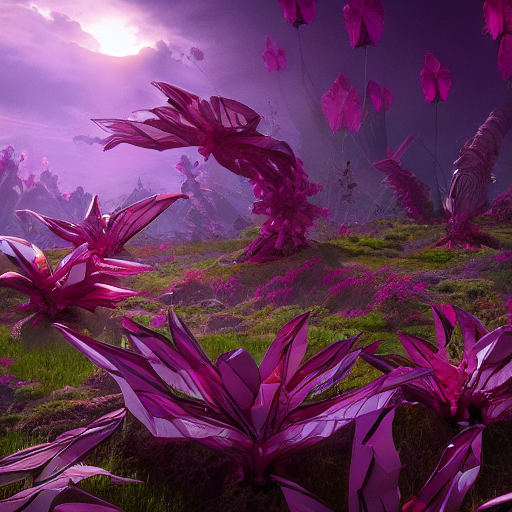

In [8]:
prompt = 'an epic flowering alien landscape in the style of origami, 8 k, cinematic light, artstation'

with autocast('cuda'):
    output = model(prompt)
    
output[0][0].show()